# 1. Import basic libraries and util functions  

In [1]:
from tqdm.notebook import tqdm
import sys
import os
from pathlib import Path
from datetime import datetime
from IPython.display import Image

# Get the absolute path to the 'utils' directory, which is assumed to be
# in the parent directory of the current Jupyter notebook's location.
utils_dir = str(Path.cwd().parent / "utils")

# Add the 'utils' directory to sys.path if it's not already included.
if utils_dir not in sys.path:
    sys.path.append(utils_dir)

# Import all functions from the '../utils/utils_parser.py' directory.
from utils_parser import *


In [2]:
def prepare_urls(year_start, season_count, league_number, league_name):
    urls = []
    for c in range(season_count):
        
        interval = f'{year_start-1-c}-{year_start-c}'
        href = f'https://fbref.com/en/comps/{league_number}/{interval}/{interval}-{league_name}'
        urls.append(href)
        
    return urls 

# 2. Get actual schema for all needed tables from fbref

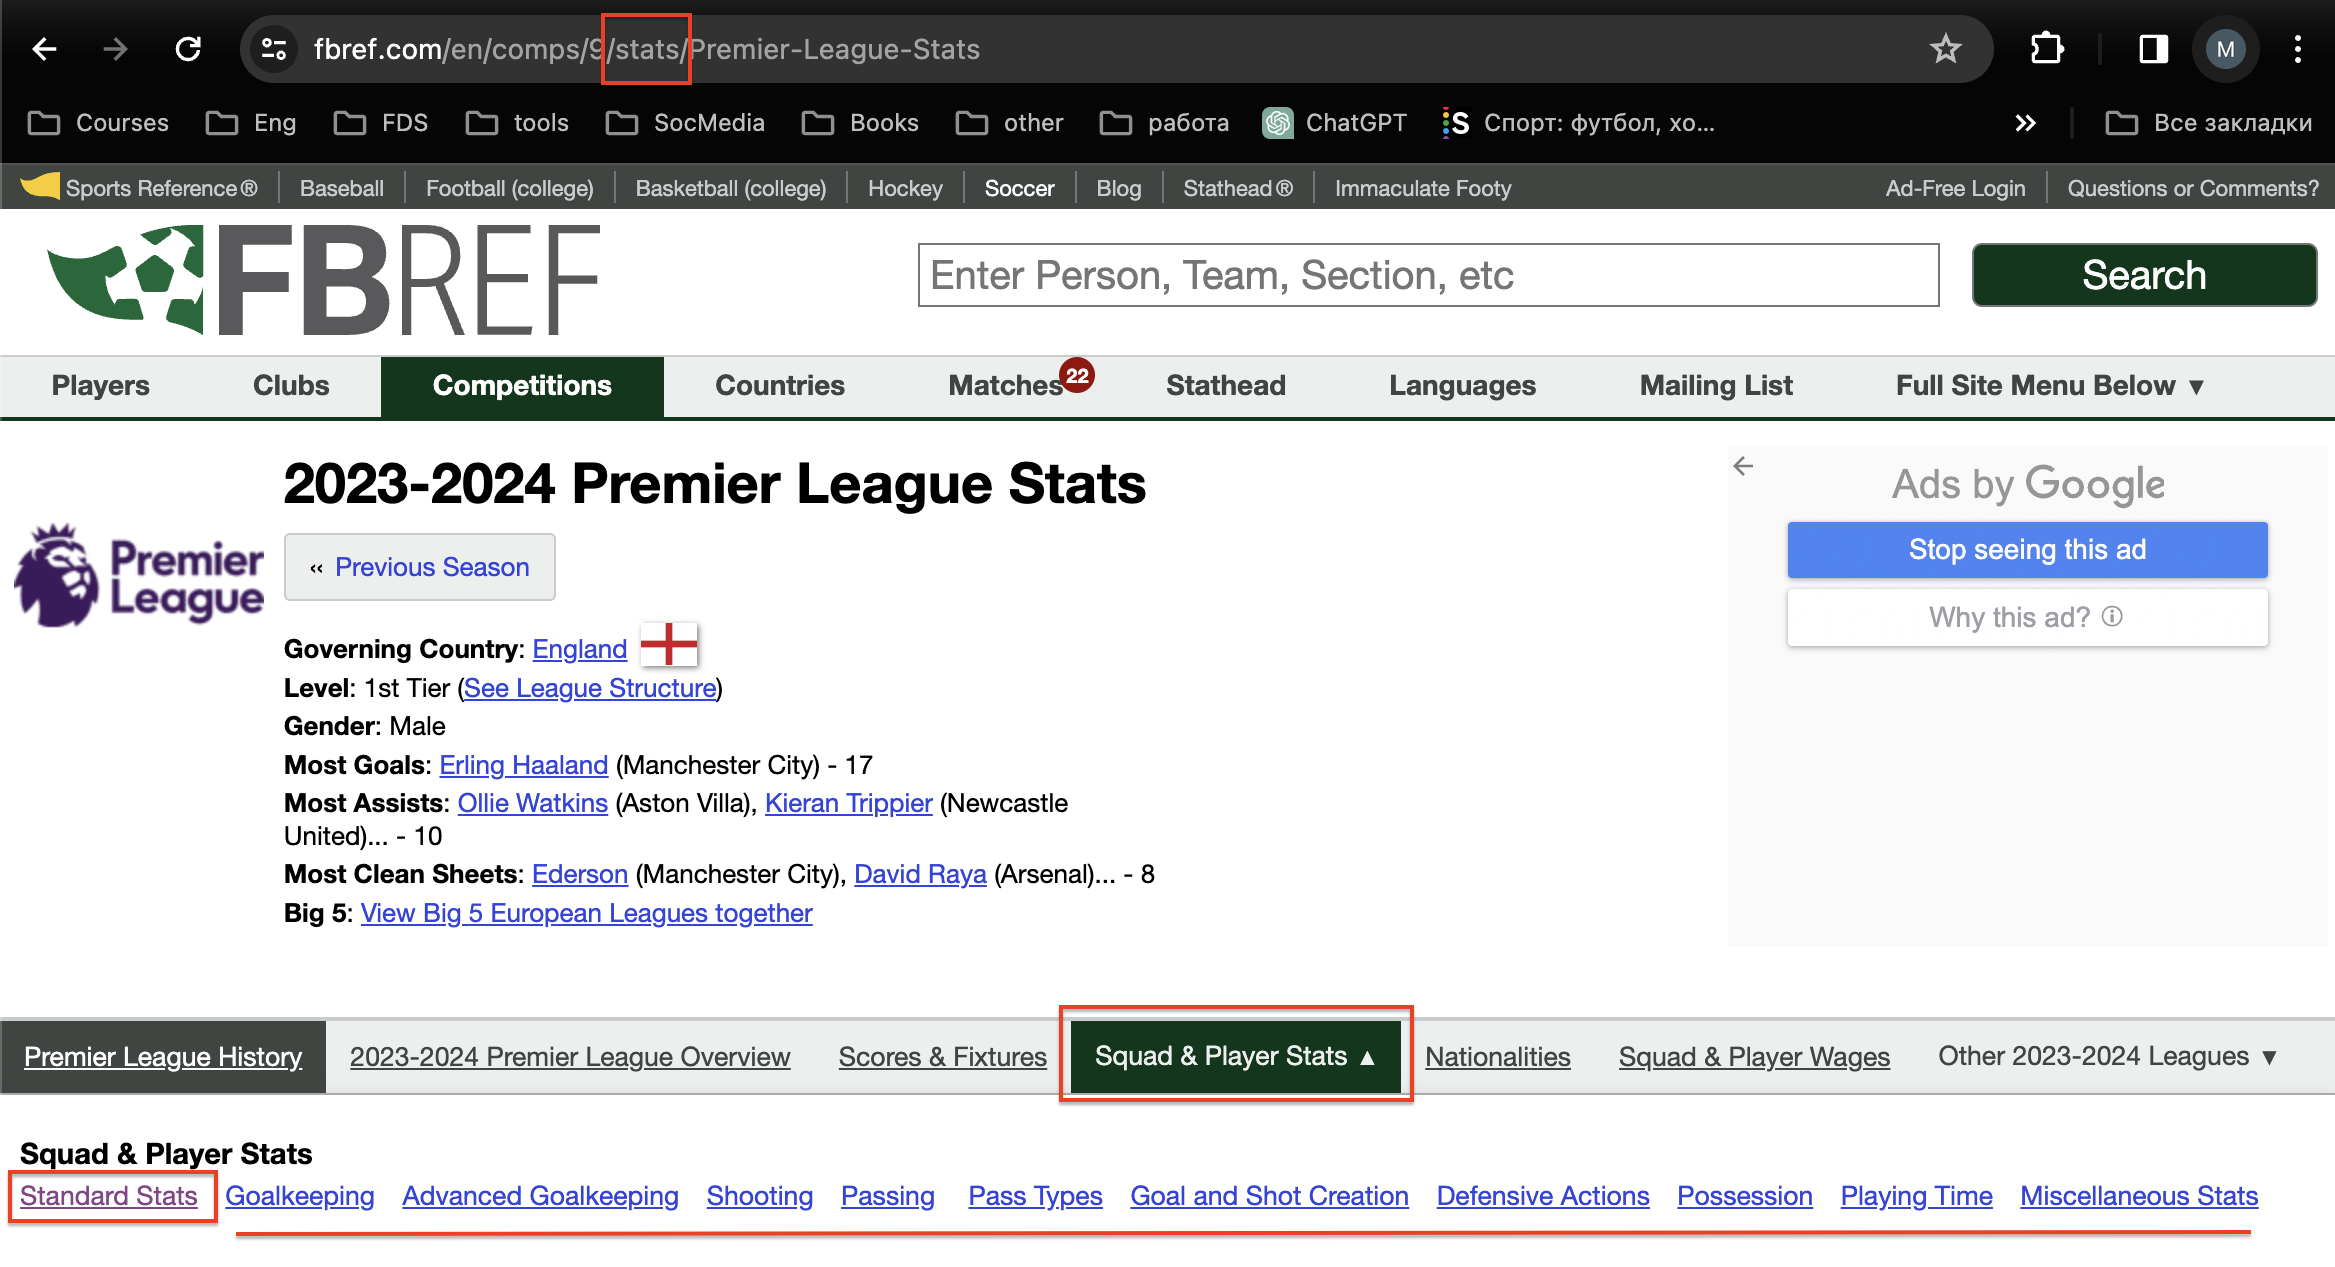

In [3]:
Image('../img/screenshot1.png')

- type of league doesn't metter
- in this examle is used EPL

https://fbref.com/en/comps/9/stats/Premier-League-Stats

In [4]:
%%time
top = 'https://fbref.com/en/comps/9/'
end = '/Premier-League-Stats'

dict_res = {}
for type_table in tqdm(['player', 'team', 'team_vs']):
    
    for type_stat in tqdm(['stats', 'shooting', 'passing', 'passing_types', 
                      'gca', 'defense', 'possession', 'misc', 'keepers', 'keepersadv', 
                           'playingtime']):
        
        columns = get_column_names_from_competitions(top, end, type_stat, type_table)
        if type_table not in dict_res.keys():
            dict_res[type_table] = {type_stat:columns}
        else:
            dict_res[type_table][type_stat] = columns

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

CPU times: user 8.38 s, sys: 344 ms, total: 8.72 s
Wall time: 5min 55s


# 3. Scrape data

## 3.1 Collect teams and players statistic for TOP5 Europe leagues for last 5 years

In [5]:
YEAR_START = 2023
SEASON_COUNT = 5

In [27]:
%%time
lst_leagues = [
                 (9,'Premier-League-Stats'),
                 (20,'Bundesliga-Stats'), 
                 (12,'La-Liga-Stats'),
                 (11,'Serie-A-Stats'),
                 (13,'Ligue-1-Stats'),
#                (57, 'Swiss-Super-League-Stats'),
#                (23,'Eredivisie-Stats'),
#                (72,'Scottish-Championship-Stats'),
#                (37,'Belgian-Pro-League-Stats'),
#                (54,'Serbian-SuperLiga-Stats'),
#                (32,'Primeira-Liga-Seasons-Stats'),
#                (40, 'Scottish-Premiership-Stats'),
#                (39,'Ukrainian-Premier-League-Stats')
                ]

lst_outfields = []
lst_keeper = []
lst_team = []
lst_team_vs = []

for league_number, league_name in tqdm(lst_leagues):

    urls = prepare_urls(YEAR_START, SEASON_COUNT, league_number, league_name)
    
    for url in urls:
        
        left_url = url.rsplit('/',1)[0] + '/'
        right_url = '/' + url.rsplit('/',1)[1]  
        
        year_start = url.rsplit('/',1)[1].split('-')[0]
        year_end = url.rsplit('/',1)[1].split('-')[1]
        
        season = year_start + '-' + year_end

        df_outfield = get_outfield_data(left_url, right_url, dict_res)
        df_keeper = get_keeper_data(left_url, right_url, dict_res)
        df_team = get_team_data(left_url, right_url, dict_res)
        df_team_vs = get_team_data_vs(left_url, right_url, dict_res)
        
        df_outfield.insert(0,'season',season)
        df_keeper.insert(0,'season',season)
        df_team.insert(0,'season',season)
        df_team_vs.insert(0,'season',season)
        
        df_outfield.insert(1,'league_name',league_name)
        df_keeper.insert(1,'league_name',league_name)
        df_team.insert(1,'league_name',league_name)
        df_team_vs.insert(1,'league_name',league_name)
    
        
        lst_outfields.append(df_outfield)
        lst_keeper.append(df_keeper)
        lst_team.append(df_team)
        lst_team_vs.append(df_team_vs)
        
        print('\n')

  0%|          | 0/5 [00:00<?, ?it/s]

get_outfield_data for /2022-2023-Premier-League-Stats is loaded
get_keeper_data for /2022-2023-Premier-League-Stats is loaded
get_team_data for /2022-2023-Premier-League-Stats is loaded
get_team_data_vs for /2022-2023-Premier-League-Stats is loaded


get_outfield_data for /2021-2022-Premier-League-Stats is loaded
get_keeper_data for /2021-2022-Premier-League-Stats is loaded
get_team_data for /2021-2022-Premier-League-Stats is loaded
get_team_data_vs for /2021-2022-Premier-League-Stats is loaded


get_outfield_data for /2020-2021-Premier-League-Stats is loaded
get_keeper_data for /2020-2021-Premier-League-Stats is loaded
get_team_data for /2020-2021-Premier-League-Stats is loaded
get_team_data_vs for /2020-2021-Premier-League-Stats is loaded


get_outfield_data for /2019-2020-Premier-League-Stats is loaded
get_keeper_data for /2019-2020-Premier-League-Stats is loaded
get_team_data for /2019-2020-Premier-League-Stats is loaded
get_team_data_vs for /2019-2020-Premier-League-Stats is loade

In [28]:
DF_outfields_OLD_ALL = pd.concat(lst_outfields, axis=0)
DF_keeper_OLD_ALL = pd.concat(lst_keeper, axis=0)
DF_team_OLD_ALL = pd.concat(lst_team, axis=0)
DF_team_vs_OLD_ALL = pd.concat(lst_team_vs, axis=0)

In [31]:
%%time
DF_outfields_OLD_ALL.to_csv('../data/old_seasons/top5_leagues_outfields_2018_2019__2022_2023.csv')
DF_keeper_OLD_ALL.to_csv('../data/old_seasons/top5_leagues_keeper_2018_2019__2022_2023.csv')
DF_team_OLD_ALL.to_csv('../data/old_seasons/top5_leagues_team_2018_2019__2022_2023.csv')
DF_team_vs_OLD_ALL.to_csv('../data/old_seasons/top5_leagues_team_vs_2018_2019__2022_2023.csv')

CPU times: user 782 ms, sys: 81.5 ms, total: 863 ms
Wall time: 889 ms


## Check

In [61]:
DF_team_OLD_ALL.groupby(['season','league_name']).agg({'squad':'count'})

squad
season    league_name                
2018-2019 Bundesliga-Stats         18
          La-Liga-Stats            20
          Ligue-1-Stats            20
          Premier-League-Stats     20
          Serie-A-Stats            20
2019-2020 Bundesliga-Stats         18
          La-Liga-Stats            20
          Ligue-1-Stats            20
          Premier-League-Stats     20
          Serie-A-Stats            20
2020-2021 Bundesliga-Stats         18
          La-Liga-Stats            20
          Ligue-1-Stats            20
          Premier-League-Stats     20
          Serie-A-Stats            20
2021-2022 Bundesliga-Stats         18
          La-Liga-Stats            20
          Ligue-1-Stats            20
          Premier-League-Stats     20
          Serie-A-Stats            20
2022-2023 Bundesliga-Stats         18
          La-Liga-Stats            20
          Ligue-1-Stats            20
          Premier-League-Stats     20
          Serie-A-Stats            20

## 3.2 Collect teams and players statistic for TOP5 Europe leagues for current season

In [50]:
%%time

season = '2023-2024'

lst_leagues = [
               (9,'Premier-League-Stats'),
               (20,'Bundesliga-Stats'), 
               (12,'La-Liga-Stats'),
               (11,'Serie-A-Stats'),
               (13,'Ligue-1-Stats'),
#                (57, 'Swiss-Super-League-Stats'),
#                (23,'Eredivisie-Stats'),
#                (72,'Scottish-Championship-Stats'),
#                (37,'Belgian-Pro-League-Stats'),
#                (54,'Serbian-SuperLiga-Stats'),
#                (32,'Primeira-Liga-Seasons-Stats'),
#                (40, 'Scottish-Premiership-Stats'),
#                (39,'Ukrainian-Premier-League-Stats')
                ]

lst_outfields = []
lst_keeper = []
lst_team = []
lst_team_vs = []

for league in tqdm(lst_leagues):
    
    left_url = f'https://fbref.com/en/comps/{league[0]}/'
    right_url = '/' + league[1]  
    league_name = league[1].rsplit('-',1)[0]
    


    df_outfield = get_outfield_data(left_url, right_url, dict_res)
    df_keeper = get_keeper_data(left_url, right_url, dict_res)
    df_team = get_team_data(left_url, right_url, dict_res)
    df_team_vs = get_team_data_vs(left_url, right_url, dict_res)

    df_outfield.insert(0,'season',season)
    df_keeper.insert(0,'season',season)
    df_team.insert(0,'season',season)
    df_team_vs.insert(0,'season',season)

    df_outfield.insert(1,'league_name',league_name)
    df_keeper.insert(1,'league_name',league_name)
    df_team.insert(1,'league_name',league_name)
    df_team_vs.insert(1,'league_name',league_name)


    lst_outfields.append(df_outfield)
    lst_keeper.append(df_keeper)
    lst_team.append(df_team)
    lst_team_vs.append(df_team_vs)
    


  0%|          | 0/5 [00:00<?, ?it/s]

get_outfield_data for /Premier-League-Stats is loaded
get_keeper_data for /Premier-League-Stats is loaded
get_team_data for /Premier-League-Stats is loaded
get_team_data_vs for /Premier-League-Stats is loaded
get_outfield_data for /Bundesliga-Stats is loaded
get_keeper_data for /Bundesliga-Stats is loaded
get_team_data for /Bundesliga-Stats is loaded
get_team_data_vs for /Bundesliga-Stats is loaded
get_outfield_data for /La-Liga-Stats is loaded
get_keeper_data for /La-Liga-Stats is loaded
get_team_data for /La-Liga-Stats is loaded
get_team_data_vs for /La-Liga-Stats is loaded
get_outfield_data for /Serie-A-Stats is loaded
get_keeper_data for /Serie-A-Stats is loaded
get_team_data for /Serie-A-Stats is loaded
get_team_data_vs for /Serie-A-Stats is loaded
get_outfield_data for /Ligue-1-Stats is loaded
get_keeper_data for /Ligue-1-Stats is loaded
get_team_data for /Ligue-1-Stats is loaded
get_team_data_vs for /Ligue-1-Stats is loaded
CPU times: user 1min 11s, sys: 5.91 s, total: 1min 17s


In [54]:
date = str(pd.to_datetime(datetime.now()).date())

if date not in os.listdir('../data/current_season/'):
    os.mkdir(f'../data/current_season/{date}')

In [56]:
DF_outfields_NOW_ALL = pd.concat(lst_outfields, axis=0)
DF_keeper_NOW_ALL = pd.concat(lst_keeper, axis=0)
DF_team_NOW_ALL = pd.concat(lst_team, axis=0)
DF_team_vs_NOW_ALL = pd.concat(lst_team_vs, axis=0)

In [58]:
%%time
DF_outfields_NOW_ALL.to_csv(f'../data/current_season/{date}/top5_leagues_outfields_2023_2024.csv')
DF_keeper_NOW_ALL.to_csv(f'../data/current_season/{date}/top5_leagues_keeper_2023_2024.csv')
DF_team_NOW_ALL.to_csv(f'../data/current_season/{date}/top5_leagues_team_2023_2024.csv')
DF_team_vs_NOW_ALL.to_csv(f'../data/current_season/{date}/top5_leagues_team_vs_2023_2024.csv')

CPU times: user 161 ms, sys: 25.9 ms, total: 187 ms
Wall time: 193 ms
